<IPython.core.display.Javascript object>


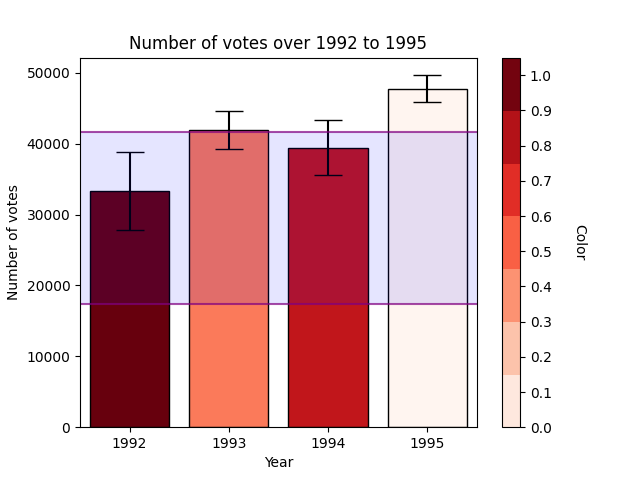

In [93]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor, Slider

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
global coord
coord = []
n = df.shape[1]
df['mean'] = df.iloc[:,1:].mean(axis = 1)
df['std'] = df.iloc[:,1:].std(axis = 1)
df['ci'] = 1.645*df['std']/np.sqrt(df.shape[1])

df = df[['mean','std','ci']]

bplt = plt.bar(df.index, df['mean'], yerr = df['ci'], capsize=10, zorder = 0)
plt.xticks([1992. ,1993. ,1994. ,1995.],['1992','1993','1994','1995'])
plt.xlim(1991.5, 1995.5)
plt.xlabel('Year')
plt.ylabel('Number of votes')
plt.title('Number of votes over 1992 to 1995')
Cursor(plt.gca(), color = 'r', vertOn = False)
data_color = []

def coloring():
    
    if coord[0] > coord[1]:
        for i in np.arange(len(df)):

            if coord[0] < (df.iloc[i]['mean'] - df.iloc[i]['ci']):
                data_color.append(0)
            elif coord[1] > (df.iloc[i]['mean'] + df.iloc[i]['ci']):
                data_color.append(0)
            elif (coord[0] < (df.iloc[i]['mean'] + df.iloc[i]['ci'])) & (coord[1] < (df.iloc[i]['mean'] - df.iloc[i]['ci'])):
                data_color.append((coord[0] -(df.iloc[i]['mean'] - df.iloc[i]['ci'])) / (2*df.iloc[i]['ci']))
            elif (coord[0] > (df.iloc[i]['mean'] + df.iloc[i]['ci'])) & (coord[1] > (df.iloc[i]['mean'] - df.iloc[i]['ci'])):
                data_color.append(((df.iloc[i]['mean'] + df.iloc[i]['ci']) - coord[1]) / (2*df.iloc[i]['ci']))
            else:
                data_color.append(1)

    if coord[1] > coord[0]:
        for i in np.arange(len(df)):

            if coord[1] < (df.iloc[i]['mean'] - df.iloc[i]['ci']):
                data_color.append(0)
            elif coord[0] > (df.iloc[i]['mean'] + df.iloc[i]['ci']):
                data_color.append(0)
            elif (coord[1] < (df.iloc[i]['mean'] + df.iloc[i]['ci'])) & (coord[0] < (df.iloc[i]['mean'] - df.iloc[i]['ci'])):
                data_color.append((coord[1] -(df.iloc[i]['mean'] - df.iloc[i]['ci'])) / (2*df.iloc[i]['ci']))
            elif (coord[1] > (df.iloc[i]['mean'] + df.iloc[i]['ci'])) & (coord[0] > (df.iloc[i]['mean'] - df.iloc[i]['ci'])):
                data_color.append(((df.iloc[i]['mean'] + df.iloc[i]['ci']) - coord[0]) / (2*df.iloc[i]['ci']))
            else:
                data_color.append(1)        

    my_cmap = plt.cm.get_cmap('Reds')
    colors = my_cmap(data_color)

    for i in np.arange(len(df)):
        bplt[i].set_facecolor(colors[i])
        bplt[i].set_edgecolor('black')

    CS = plt.contourf([np.linspace(0,1,4), data_color],cmap=my_cmap)
    CS.set_clim((0,1))
    cbar = plt.colorbar(CS, cmap=my_cmap, ticks=np.linspace(0,1,11))
    cbar.set_label('Color', rotation=270,labelpad=25)

def draw_lines(event):
    
    coord.append(event.ydata)
    plt.axhline(event.ydata, 0, 7, color='purple', alpha = 0.7, zorder = 1)
    
    
    if len(coord) >= 2:
        plt.gcf().canvas.mpl_disconnect(cid)
        plt.gca().fill_between([1990,1997],coord[0],coord[1],facecolor='blue',alpha=0.1, where=True)
        coloring()
        plt.gcf().canvas.draw()

        
# def redraw(event):
    
#     if event.key == 'r':
#         plt.cla()
#         bplt = plt.bar(df.index, df['mean'], yerr = df['ci'], capsize=10, zorder = 0)
#         plt.xticks([1992. ,1993. ,1994. ,1995.],['1992','1993','1994','1995'])
#         plt.xlim(1991.5, 1995.5)
#         plt.gcf().canvas.draw()
#         coord = []
#         cid = plt.gcf().canvas.mpl_connect('button_press_event', draw_lines)
#         plt.gcf().canvas.mpl_disconnect(crd)
    

cid = plt.gcf().canvas.mpl_connect('button_press_event', draw_lines)

